# 基本分类

In [3]:
import tensorflow as tf
from tensorflow import keras

# 辅助库
import numpy as np
from matplotlib import pyplot as plt

/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorf

导入服装的训练数据集

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

0-9对应相对的标签

In [5]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

数据预处理

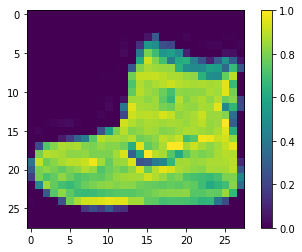

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

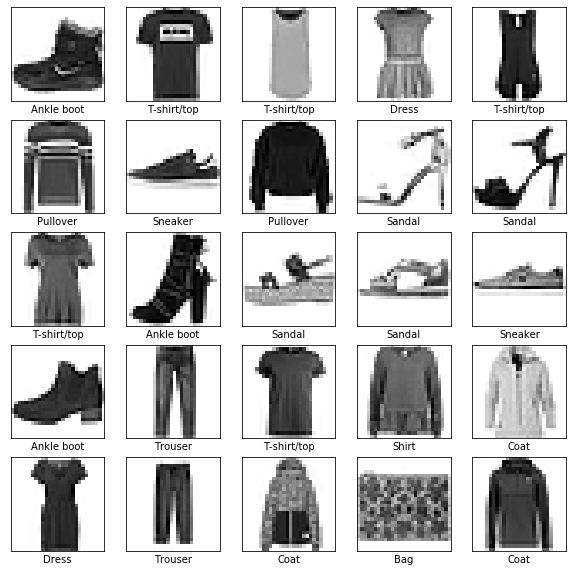

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

# 构建模型
设置网络层

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0801 08:16:10.449864 140681547536192 deprecation.py:506] From /home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


编译模型

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

训练模型

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4968 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3681 - acc: 0.8676
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3353 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3107 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2918 - acc: 0.8931


评估准确率

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('准确率', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3620 - acc: 0.8680
准确率 0.868


进行预测

In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([1.1416932e-06, 5.1037682e-07, 2.2537506e-06, 2.2764841e-06,
       9.5461030e-07, 2.8285764e-03, 2.2770205e-06, 1.3592214e-02,
       3.7629468e-06, 9.8356611e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [44]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel('%s %d%% (%s)' % (class_name[predicted_label],
                                100 * np.max(predictions_array),
                                class_name[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

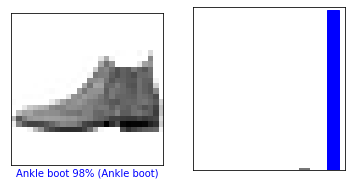

In [45]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

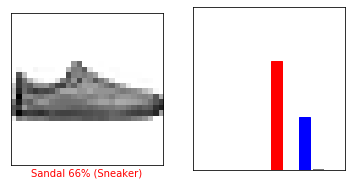

In [46]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

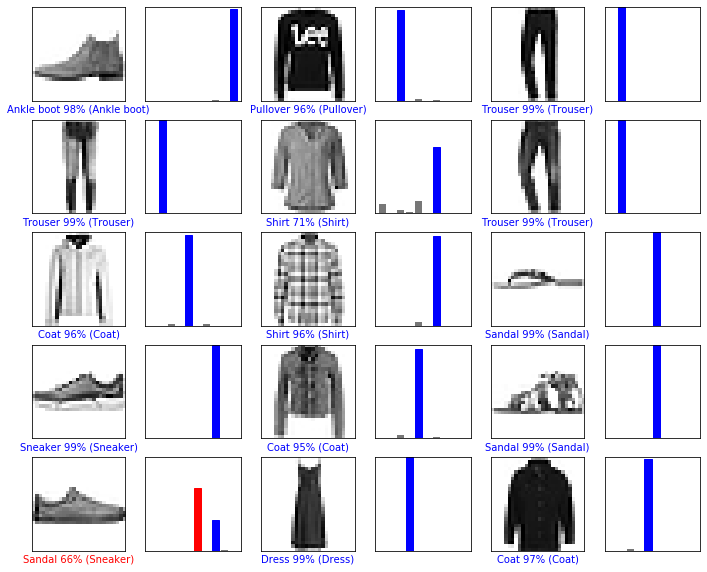

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

使用单个图像进行预测

In [48]:
img = test_images[0]

img.shape

(28, 28)

In [49]:
img = (np.expand_dims(img, 0))

img.shape

(1, 28, 28)

In [50]:
predictions_single = model.predict(img)

predictions_single

array([[1.1416955e-06, 5.1037682e-07, 2.2537486e-06, 2.2764864e-06,
        9.5461030e-07, 2.8285789e-03, 2.2770228e-06, 1.3592220e-02,
        3.7629504e-06, 9.8356611e-01]], dtype=float32)

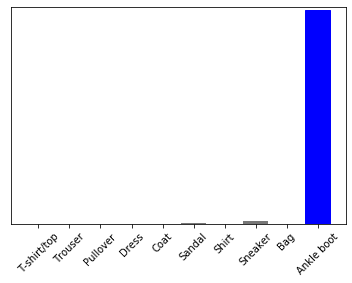

In [55]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_name, rotation=45)
plt.show()

In [56]:
np.argmax(predictions_single[0])

9